# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

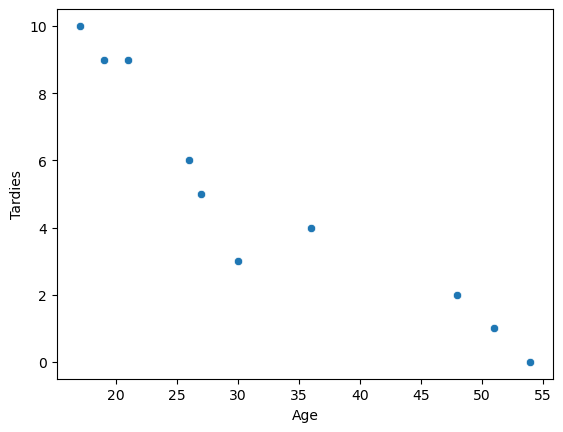

In [4]:
# Draw a scatter plot for the data
sns.scatterplot(data=student_data, x='Age', y='Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

> It seems that there is an inverse relationship between age and number of tardies. The younger the student, the more tardies they have.The points suggest that there is an almost linear relationship between the two variables (age and tardies).

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
# Calculate covariance and correlation of the variables.
covariance = np.cov(student_data['Age'], student_data['Tardies'])
correlation = np.corrcoef(student_data['Age'], student_data['Tardies'])
display(covariance)
display(correlation)
print(f'Covariance: {covariance[0][1]}')
print(f'Correlation: {correlation[0][1]}')

print("The covariance is negative, which means that the variables are inversely related. The correlation is also negative and close to -1, which confirms there is a linear relationship between the variables.")

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

array([[ 1.        , -0.93916269],
       [-0.93916269,  1.        ]])

Covariance: -45.56666666666666
Correlation: -0.9391626886887122
The covariance is negative, which means that the variables are inversely related. The correlation is also negative and close to -1, which confirms there is a linear relationship between the variables.


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [122]:
# Build a linear regression model
model = smf.ols(formula='Tardies ~ Age', data=student_data)
results = model.fit()
print(results.summary())
print(results.params)

'''I used the OLS regression model from the statsmodels library to build a linear regression model. 
The model shows that the coefficient for the Age variable is -0.2428 and the intercept is 12.8888  
The R-squared value is 0.8823, which means that 88.23% of the variance in the Tardies variable can 
be explained by the Age variable.'''

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           5.57e-05
Time:                        18:51:04   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.0

c:\Users\Natanael\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


'I used the OLS regression model from the statsmodels library to build a linear regression model. \nThe model shows that the coefficient for the Age variable is -0.2428 and the intercept is 12.8888  \nThe R-squared value is 0.8823, which means that 88.23% of the variance in the Tardies variable can \nbe explained by the Age variable.'

Plot your regression model on your scatter plot.

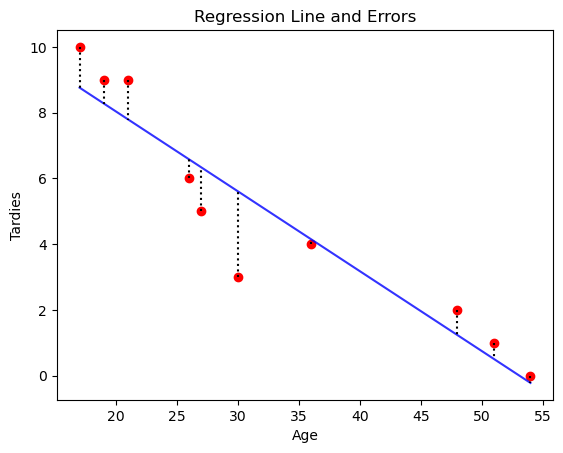

12.888803363135764 -0.2428207709159807


In [58]:
x = student_data['Age']
y = student_data['Tardies']

a0, a1 = results.params
plt.scatter(x, y, color='red')  # Scatter plot

# Plot the regression line
plt.plot([x.min(), x.max()], [a0 + a1 * x.min(), a0 + a1 * x.max()], alpha=0.8, color='blue')

# Add pointed black lines to illustrate the errors
for xi, yi in zip(x, y):
    plt.plot([xi]*2, [yi, a0 + a1 * xi], "k:")

# Optionally restrict the domain
# plt.xlim(2, 9); plt.ylim(0, 20)

plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Regression Line and Errors')
plt.show()

print(a0, a1)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

> The model indicates that there is a relationship between age and tardiness. The older the person, the less tardy they are. From the OSL, we obtained an R2 value of 0.88, which indicates that 88% of the variance in tardiness can be explained by age. The high value indicates that age is a good predictor of tardines, yet these results may not be accurate because the sample size is very small. Therefore, generalizing these results to the entire population may not be appropriate. More data is required to make a more accurate prediction.

### Extra practice with other libraries (sns and sklearn), not in the original lab

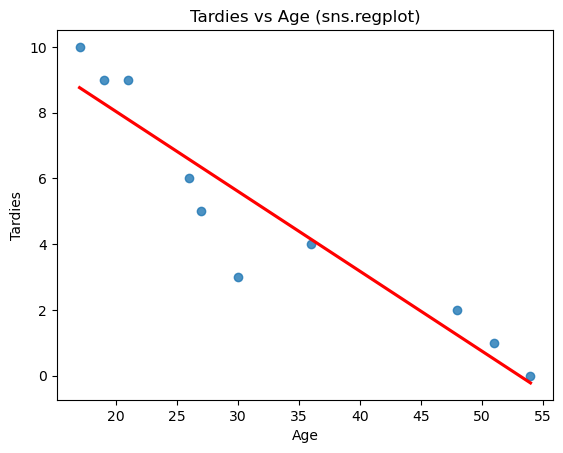

In [24]:
# Plot the regression line on scatter plot using sns for learning purposes
sns.regplot(data=student_data, x='Age', y='Tardies', ci=None, line_kws={'color':'red'})
# plot title
plt.title('Tardies vs Age (sns.regplot)')
plt.show()

Intercept: 12.888803363135768
Coefficient: [-0.24282077]


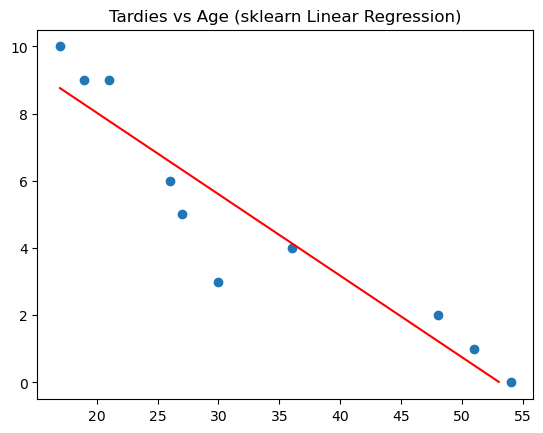

In [34]:
# Build linear regresion model and graph it using sklearn for learning purposes

lm = LinearRegression()
lm.fit(student_data[['Age']], student_data['Tardies'])
print(f'Intercept: {lm.intercept_}')
print(f'Coefficient: {lm.coef_}')

age_min, age_max = student_data['Age'].min(), student_data['Age'].max()

age_model = np.arange(age_min, age_max).reshape(-1, 1)                  # Create a range of ages
tardies_model = [lm.intercept_ + lm.coef_ * age for age in age_model]   # Calculate the tardies using the model

plt.scatter(student_data['Age'], student_data['Tardies'])               # Scatter plot
plt.plot(age_model, tardies_model, color='red')                         # Regression line
plt.title('Tardies vs Age (sklearn Linear Regression)')
plt.show()

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [59]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

In [61]:
display(vehicles.head())
display(vehicles.describe())
vehicles.info()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [83]:
# Your code here.

cars = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
co2 = vehicles['CO2 Emission Grams/Mile']

# Calculate the correlations between each of the variables and the CO2 emissions
correlations = cars.corrwith(co2) # the same result as np.corrcoef
display(correlations)

''' I think the variables that will be the most important in determining CO2 emissions are 'Fuel Barrels/Year', 'Fuel Cost/Year, and probably 'Combined MPG'. 
My guess is that the other variables will not provide too much information'''

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64

" I think the variables that will be the most important in determining CO2 emissions are 'Fuel Barrels/Year', 'Fuel Cost/Year, and probably 'Combined MPG'. \nMy guess is that the other variables will not provide too much information"

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [135]:
import statsmodels.api as sm

# Add a constant to the independent variables matrix (for the intercept)
X = sm.add_constant(cars)

# Fit the OLS regression model
model = sm.OLS(co2, X).fit()

'''
I used the OLS regression model from the statsmodels library to build a linear regression model.
Since the model has multiple independent variables, I added a constant to the independent variables 
matrix to account for the intercept, and the model does not give us a line, but a hyperplane, since all
variables are used to predict the CO2 emissions.'''

'\nI used the OLS regression model from the statsmodels library to build a linear regression model.\nSince the model has multiple independent variables, I added a constant to the independent variables \nmatrix to account for the intercept, and the model does not give us a line, but a hyperplane, since all\nvariables are used to predict the CO2 emissions.'

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [133]:
# Your code here.
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                             19:00:09   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

> The regression model indicates that the most important variable in determining CO2 emissions is Fuel Barrels/Year. This is because it has the highest coefficient value. The R2 value of 0.98 indicates that 98% of the variance in CO2 emissions can be explained by the independent variables. The high R2 value suggests that the model is a good fit for the data. However, the high R2 value may also indicate overfitting. Therefore, it is important to test the model on new data to determine its accuracy.
>
> We can use the coefficients in the summary to get the equation of the hyperplane. The coefficients
>
> <div align = "center">
> 
> | Variable            | Coefficient  |
> |---------------------:|:--------------|
> | const               | 769.8883     |
> | Year                | -0.3206      |
> | Cylinders           | 1.8788       |
> | Fuel Barrels/Year   | 19.0529      |
> | Combined MPG        | -3.0404      |
> | Fuel Cost/Year      | 0.0323       |
> 
> </div>
>
> give us the equation
> $$ y = 769.8883 - 0.3206 \times \text{Year} + 1.8788 \times \text{Cylinders} + 19.0529 \times \text{Fuel Barrels/Year} - 3.0404 \times \text{Combined MPG} + 0.0323 \times \text{Fuel Cost/Year} $$

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [22]:
# Your code here.
import pandas as pd
df = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Attended': [1,2,4,4,5,7,8,13]})
display(df.shape)
df.head(15)

(8, 2)

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

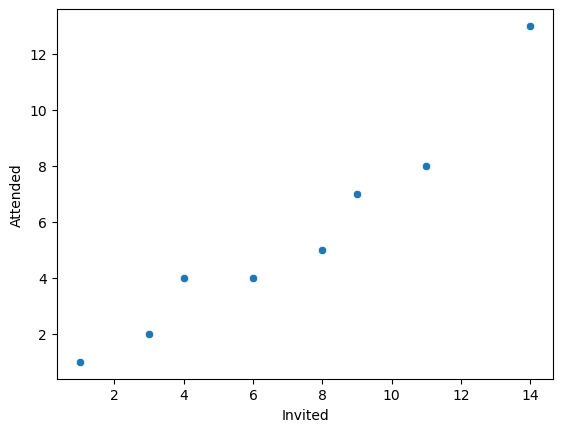

In [19]:
# Your code here.
import matplotlib.pyplot as plt
import seaborn as sns

# scater plot the points
sns.scatterplot(data=df, x='Invited', y='Attended')
plt.show()

Covariance: 16.0
Correlation: 0.9652303546573691
                            OLS Regression Results                            
Dep. Variable:               Attended   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           0.000102
Time:                        14:51:58   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int

c:\Users\Natanael\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


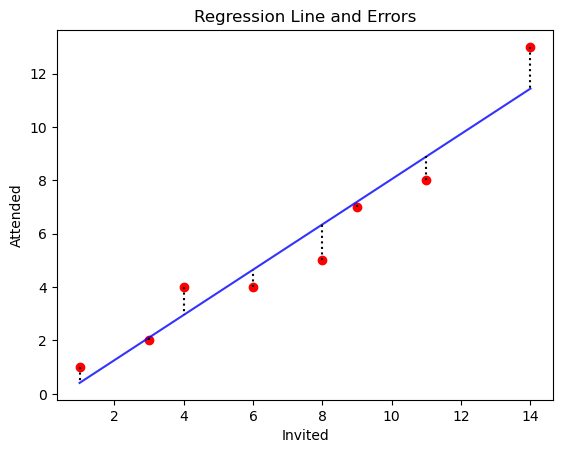

In [20]:
import numpy as np
import statsmodels.formula.api as smf

# Calculate covariance and correlation of the variables.
covariance = np.cov(df['Invited'], df['Attended'])
correlation = np.corrcoef(df['Invited'], df['Attended'])
print(f'Covariance: {covariance[0][1]}')
print(f'Correlation: {correlation[0][1]}')

# Build a linear regression model
model = smf.ols(formula='Attended ~ Invited', data=df)
results = model.fit()
print(results.summary())

# Plot the regression line and scatter plot
x = df['Invited']
y = df['Attended']

a0, a1 = results.params
plt.scatter(x, y, color='red')  # Scatter plot

# Plot the regression line
plt.plot([x.min(), x.max()], [a0 + a1 * x.min(), a0 + a1 * x.max()], alpha=0.8, color='blue')

# Add pointed black lines to illustrate the errors
for xi, yi in zip(x, y):
    plt.plot([xi]*2, [yi, a0 + a1 * xi], "k:")
plt.xlabel('Invited')
plt.ylabel('Attended')
plt.title('Regression Line and Errors')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

> The plot suggests that there is a linear relationship between the number of people invited and the number of people who attend. The regression model indicates that the relationship is linear. The R2 value of 0.93 indicates that 93% of the variance in the number of people who attend can be explained by the number of people invited. The high R2 value suggests that the model is a good fit for the data.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

(7, 2)

Covariance: 8.666666666666666
Correlation: 0.9712781168250859
                            OLS Regression Results                            
Dep. Variable:               Attended   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           0.000264
Time:                        14:55:03   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

c:\Users\Natanael\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


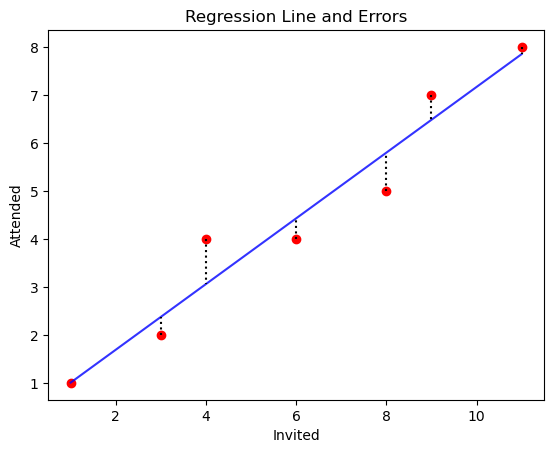

In [25]:
# Remove last datapoint
df2 = df[:-1]
display(df2.shape)

covariance = np.cov(df2['Invited'], df2['Attended'])
correlation = np.corrcoef(df2['Invited'], df2['Attended'])
print(f'Covariance: {covariance[0][1]}')
print(f'Correlation: {correlation[0][1]}')

# Build a linear regression model
model = smf.ols(formula='Attended ~ Invited', data=df2)
results = model.fit()
print(results.summary())

# Plot the regression line and scatter plot
x = df2['Invited']
y = df2['Attended']

a0, a1 = results.params
plt.scatter(x, y, color='red')  # Scatter plot

# Plot the regression line
plt.plot([x.min(), x.max()], [a0 + a1 * x.min(), a0 + a1 * x.max()], alpha=0.8, color='blue')

# Add pointed black lines to illustrate the errors
for xi, yi in zip(x, y):
    plt.plot([xi]*2, [yi, a0 + a1 * xi], "k:")
plt.xlabel('Invited')
plt.ylabel('Attended')
plt.title('Regression Line and Errors')
plt.show()


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

> Removing the problematic point gave us a sligtly larger R2 (0.943), and the datapoints are closer to the regression line (that is, the errors are smaller, also confirmed with the "std error" value in the summary). The coefficient values also changed, but the general trend of the data remains the same.